# To Explore Decision Tree Algorithm

Creating the Decision Tree classifier for the given 'iris' dataset and visualising it graphically.

In [24]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
data = pd.read_csv(r'C:\Users\Hp\Downloads\iris.csv') # loading the iris data set
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data = data.drop(['Id'], axis=1) #dropping the irrelevant columns

In [27]:
data.shape #number of rows and columns after dropping

(150, 5)

In [28]:
data.info() #analysing the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
data.describe() #finding min, max, mean, standard deviation etc.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Subplots of all Column

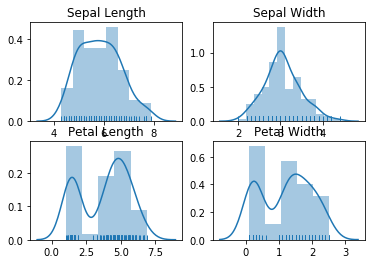

In [30]:
plt.subplot(2,2,1) # Plot of Sepal Length
sns.distplot(data['SepalLengthCm'].values, rug=True)
plt.title('Sepal Length')

plt.subplot(2,2,2) # Plot of Sepal Width
sns.distplot(data['SepalWidthCm'].values, rug=True)
plt.title('Sepal Width')

plt.subplot(2,2,3) # Plot of Petal Length
sns.distplot(data['PetalLengthCm'].values, rug=True)
plt.title('Petal Length')

plt.subplot(2,2,4) # Plot of Petal Width
sns.distplot(data['PetalWidthCm'].values, rug=True)
plt.title('Petal Width')

plt.show()

# Pairplot 

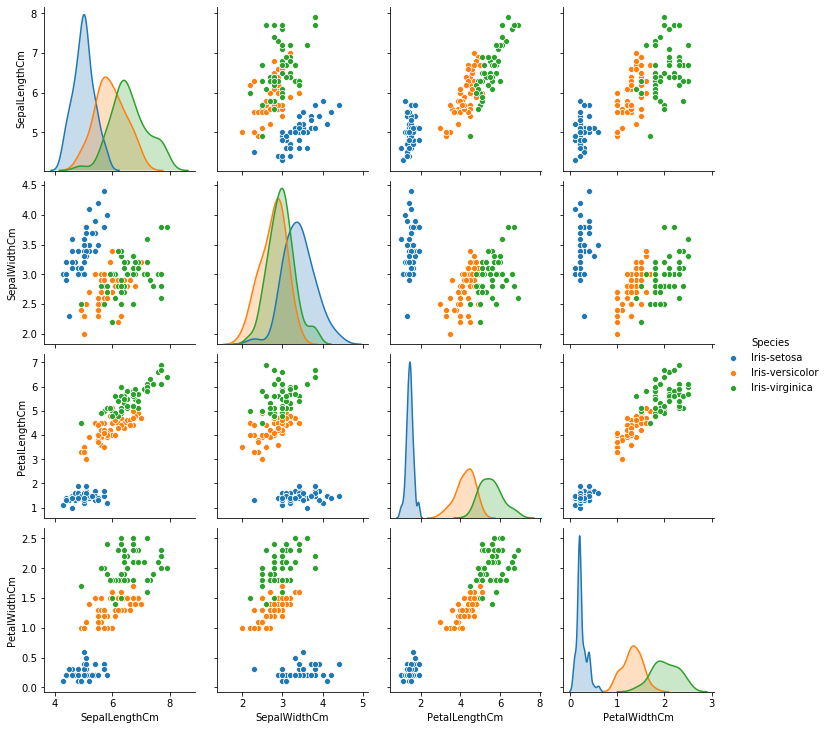

In [31]:
sns.pairplot(data, hue='Species') # pairplot according to species

In [33]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values # setting independent and dependent variables
y = data['Species'].values

In [35]:
lbEncoder = LabelEncoder() #lables to species column
y = lbEncoder.fit_transform(y)

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [38]:
#splitting our data over train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42) 

# Decision Tree

In [39]:
# Making the instance of Decision Tree by calling DecisionTreeClassifier() without changing any parameters
dt = DecisionTreeClassifier()

In [40]:
dt.fit(x_train, y_train) # fitting our model to the training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_pred = dt.predict(x_test) #Prediction
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred) #Accuracy overv test data

1.0

In [44]:
print('Classification Report of the Model is as follows:\n') #classification report
print(classification_report(y_test, y_pred))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
print('Confusion matrix:\n') #confusion matrix
print(confusion_matrix(y_test, y_pred))

Confusion matrix:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


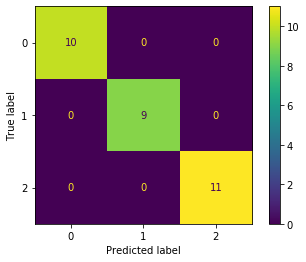

In [47]:
from sklearn.metrics import plot_confusion_matrix  #plotting confusion matrix
plot_confusion_matrix(dt, x_test, y_test)
plt.show()

# Plot Tree

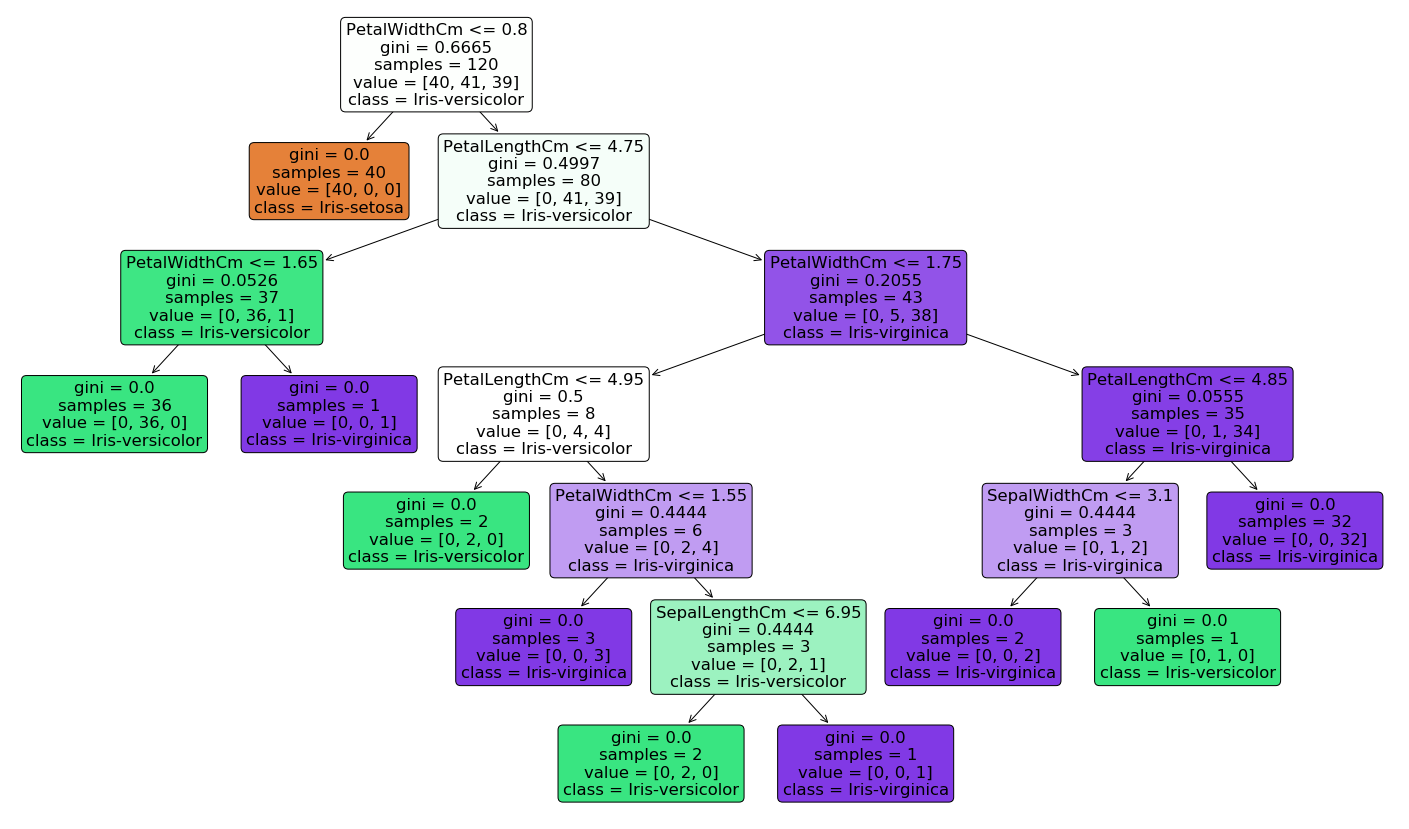

In [48]:
from sklearn.tree import plot_tree  #importing plot_tree
plt.figure(figsize=(25,15))

tree_image = plot_tree(dt,feature_names=data.columns,class_names=data['Species'].unique().tolist(),
                       precision=4,label='all',filled='True',rounded='True')

plt.show()  #plt.savefig('ShowTree')

So now if we replace the iris dataset any new dataset, the model will be able to predict the right class accordingly. 